In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# データの読み込み
df = pd.read_csv('data/UNSW_NB15/UNSW_NB15_testing-set.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


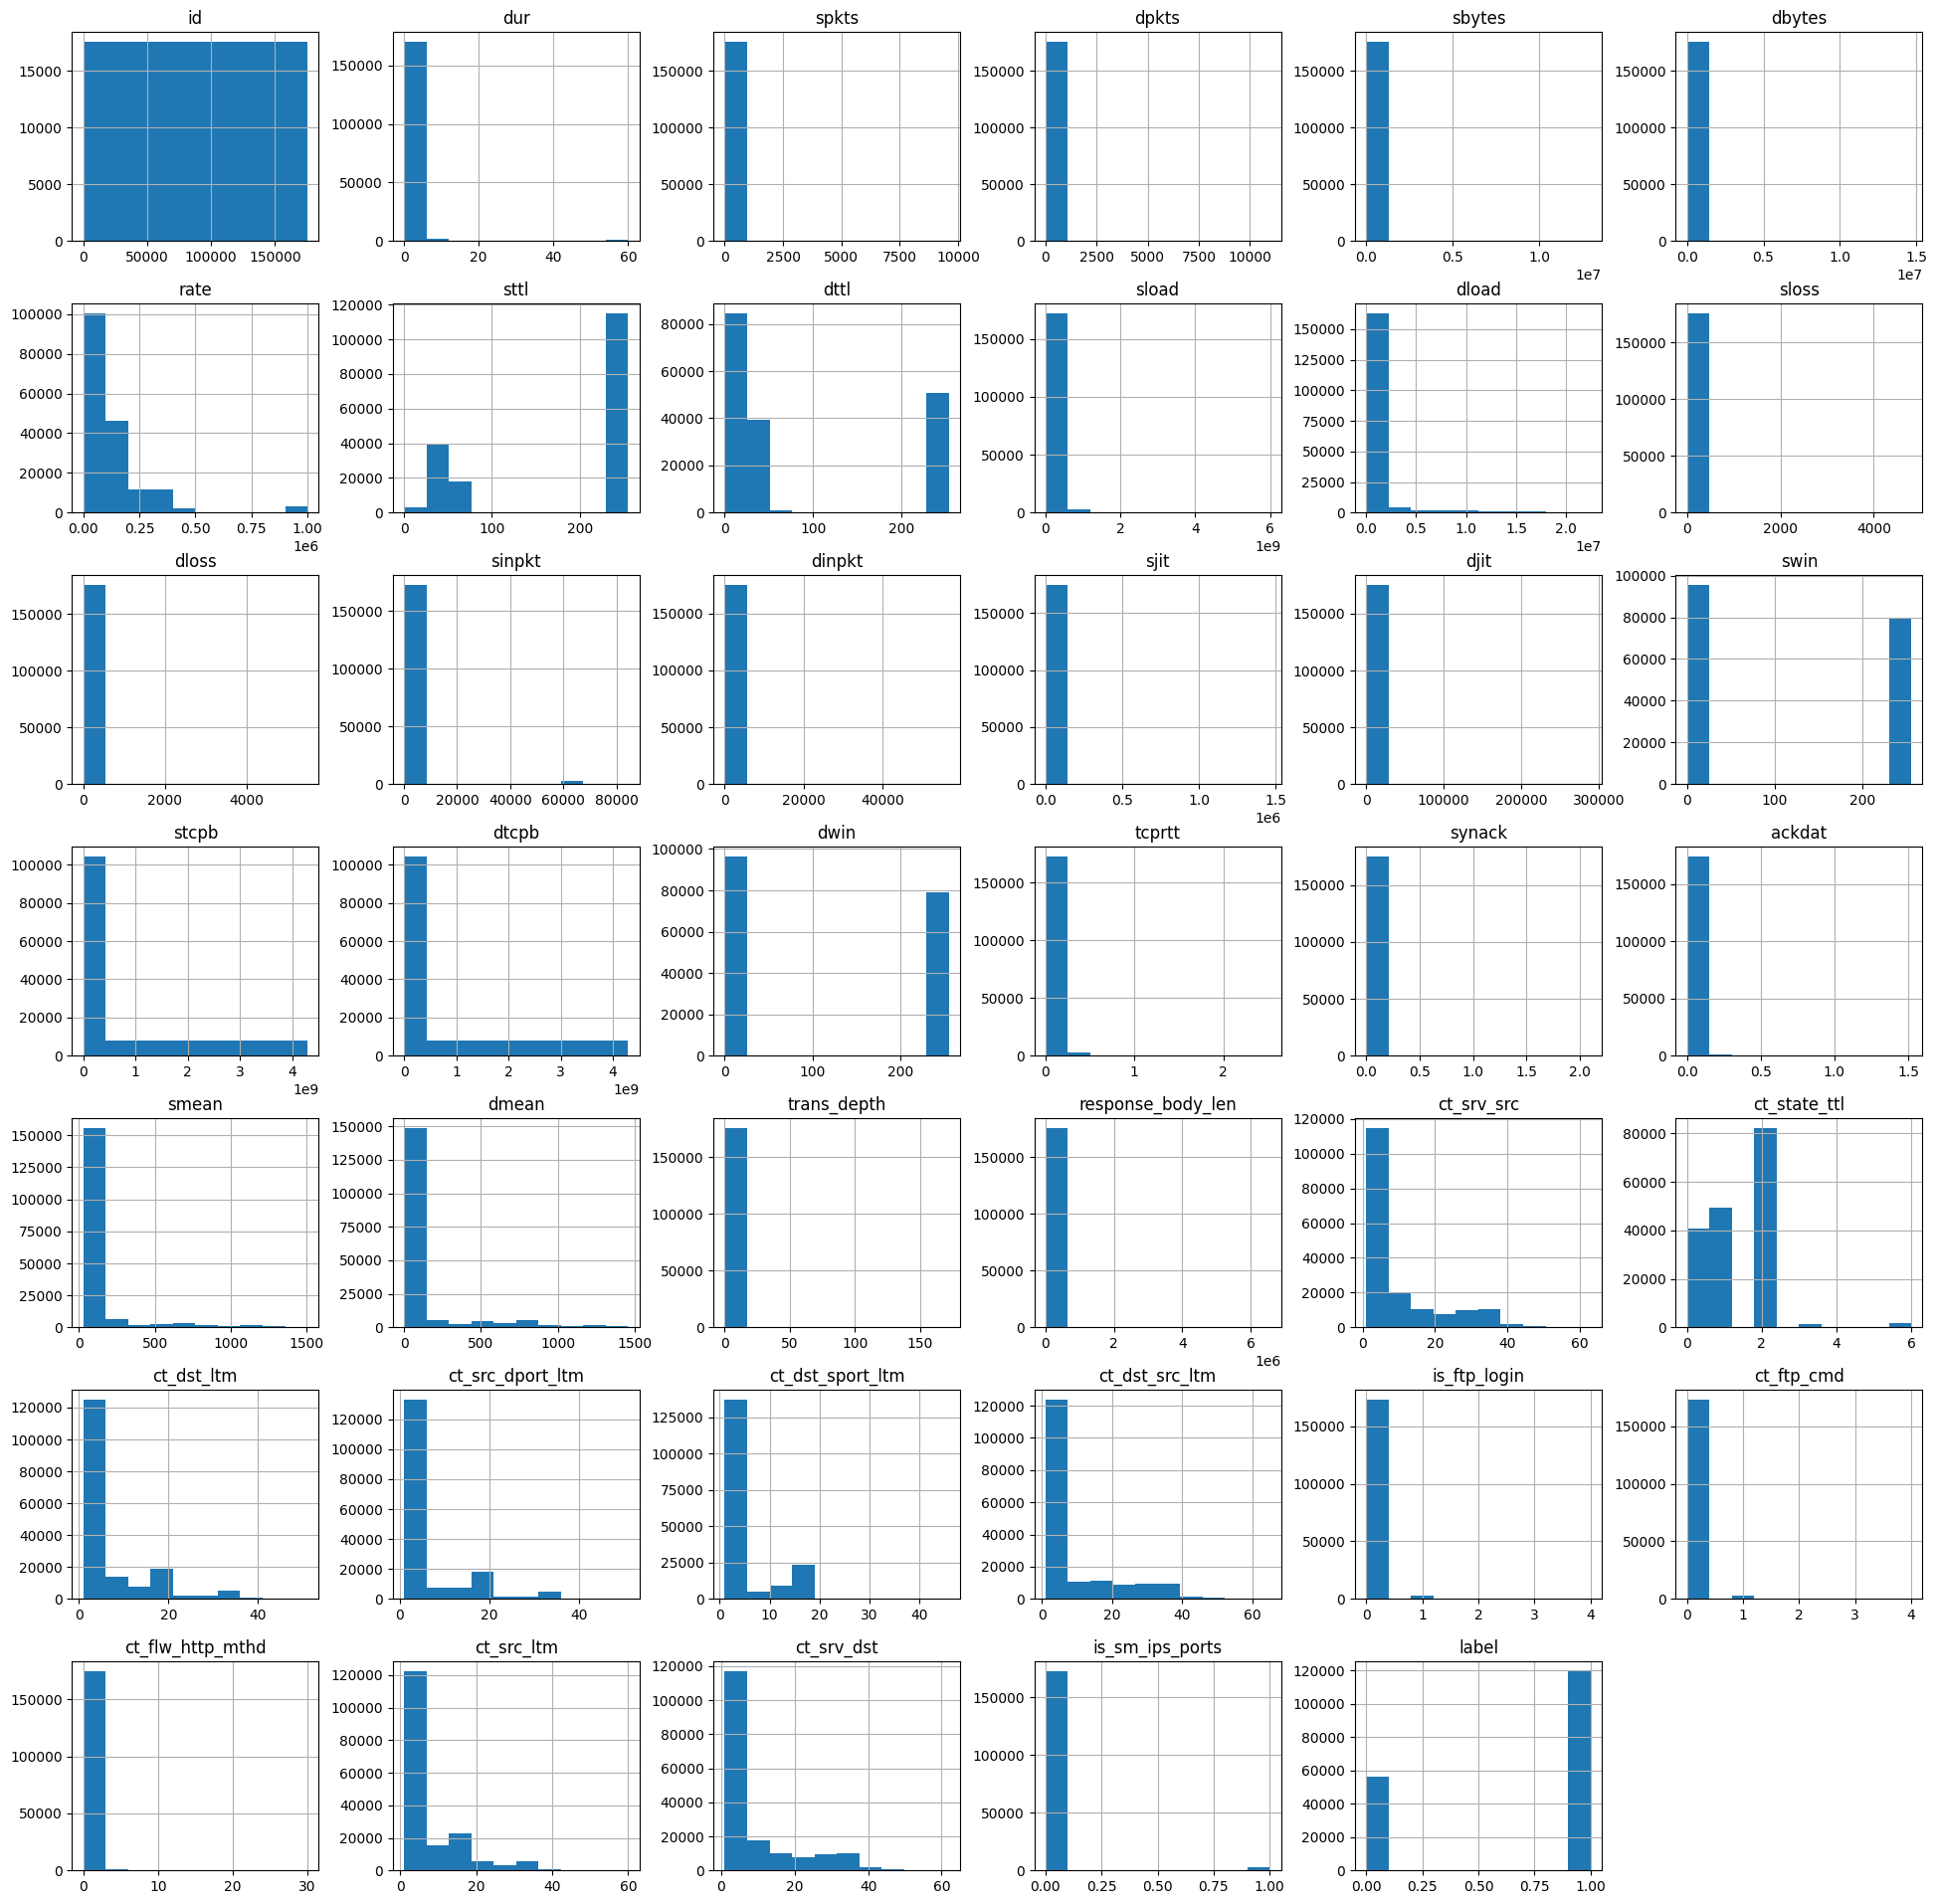

In [3]:
# 各特徴量の分布を表示
df.hist(figsize=(24, 24))
plt.show()

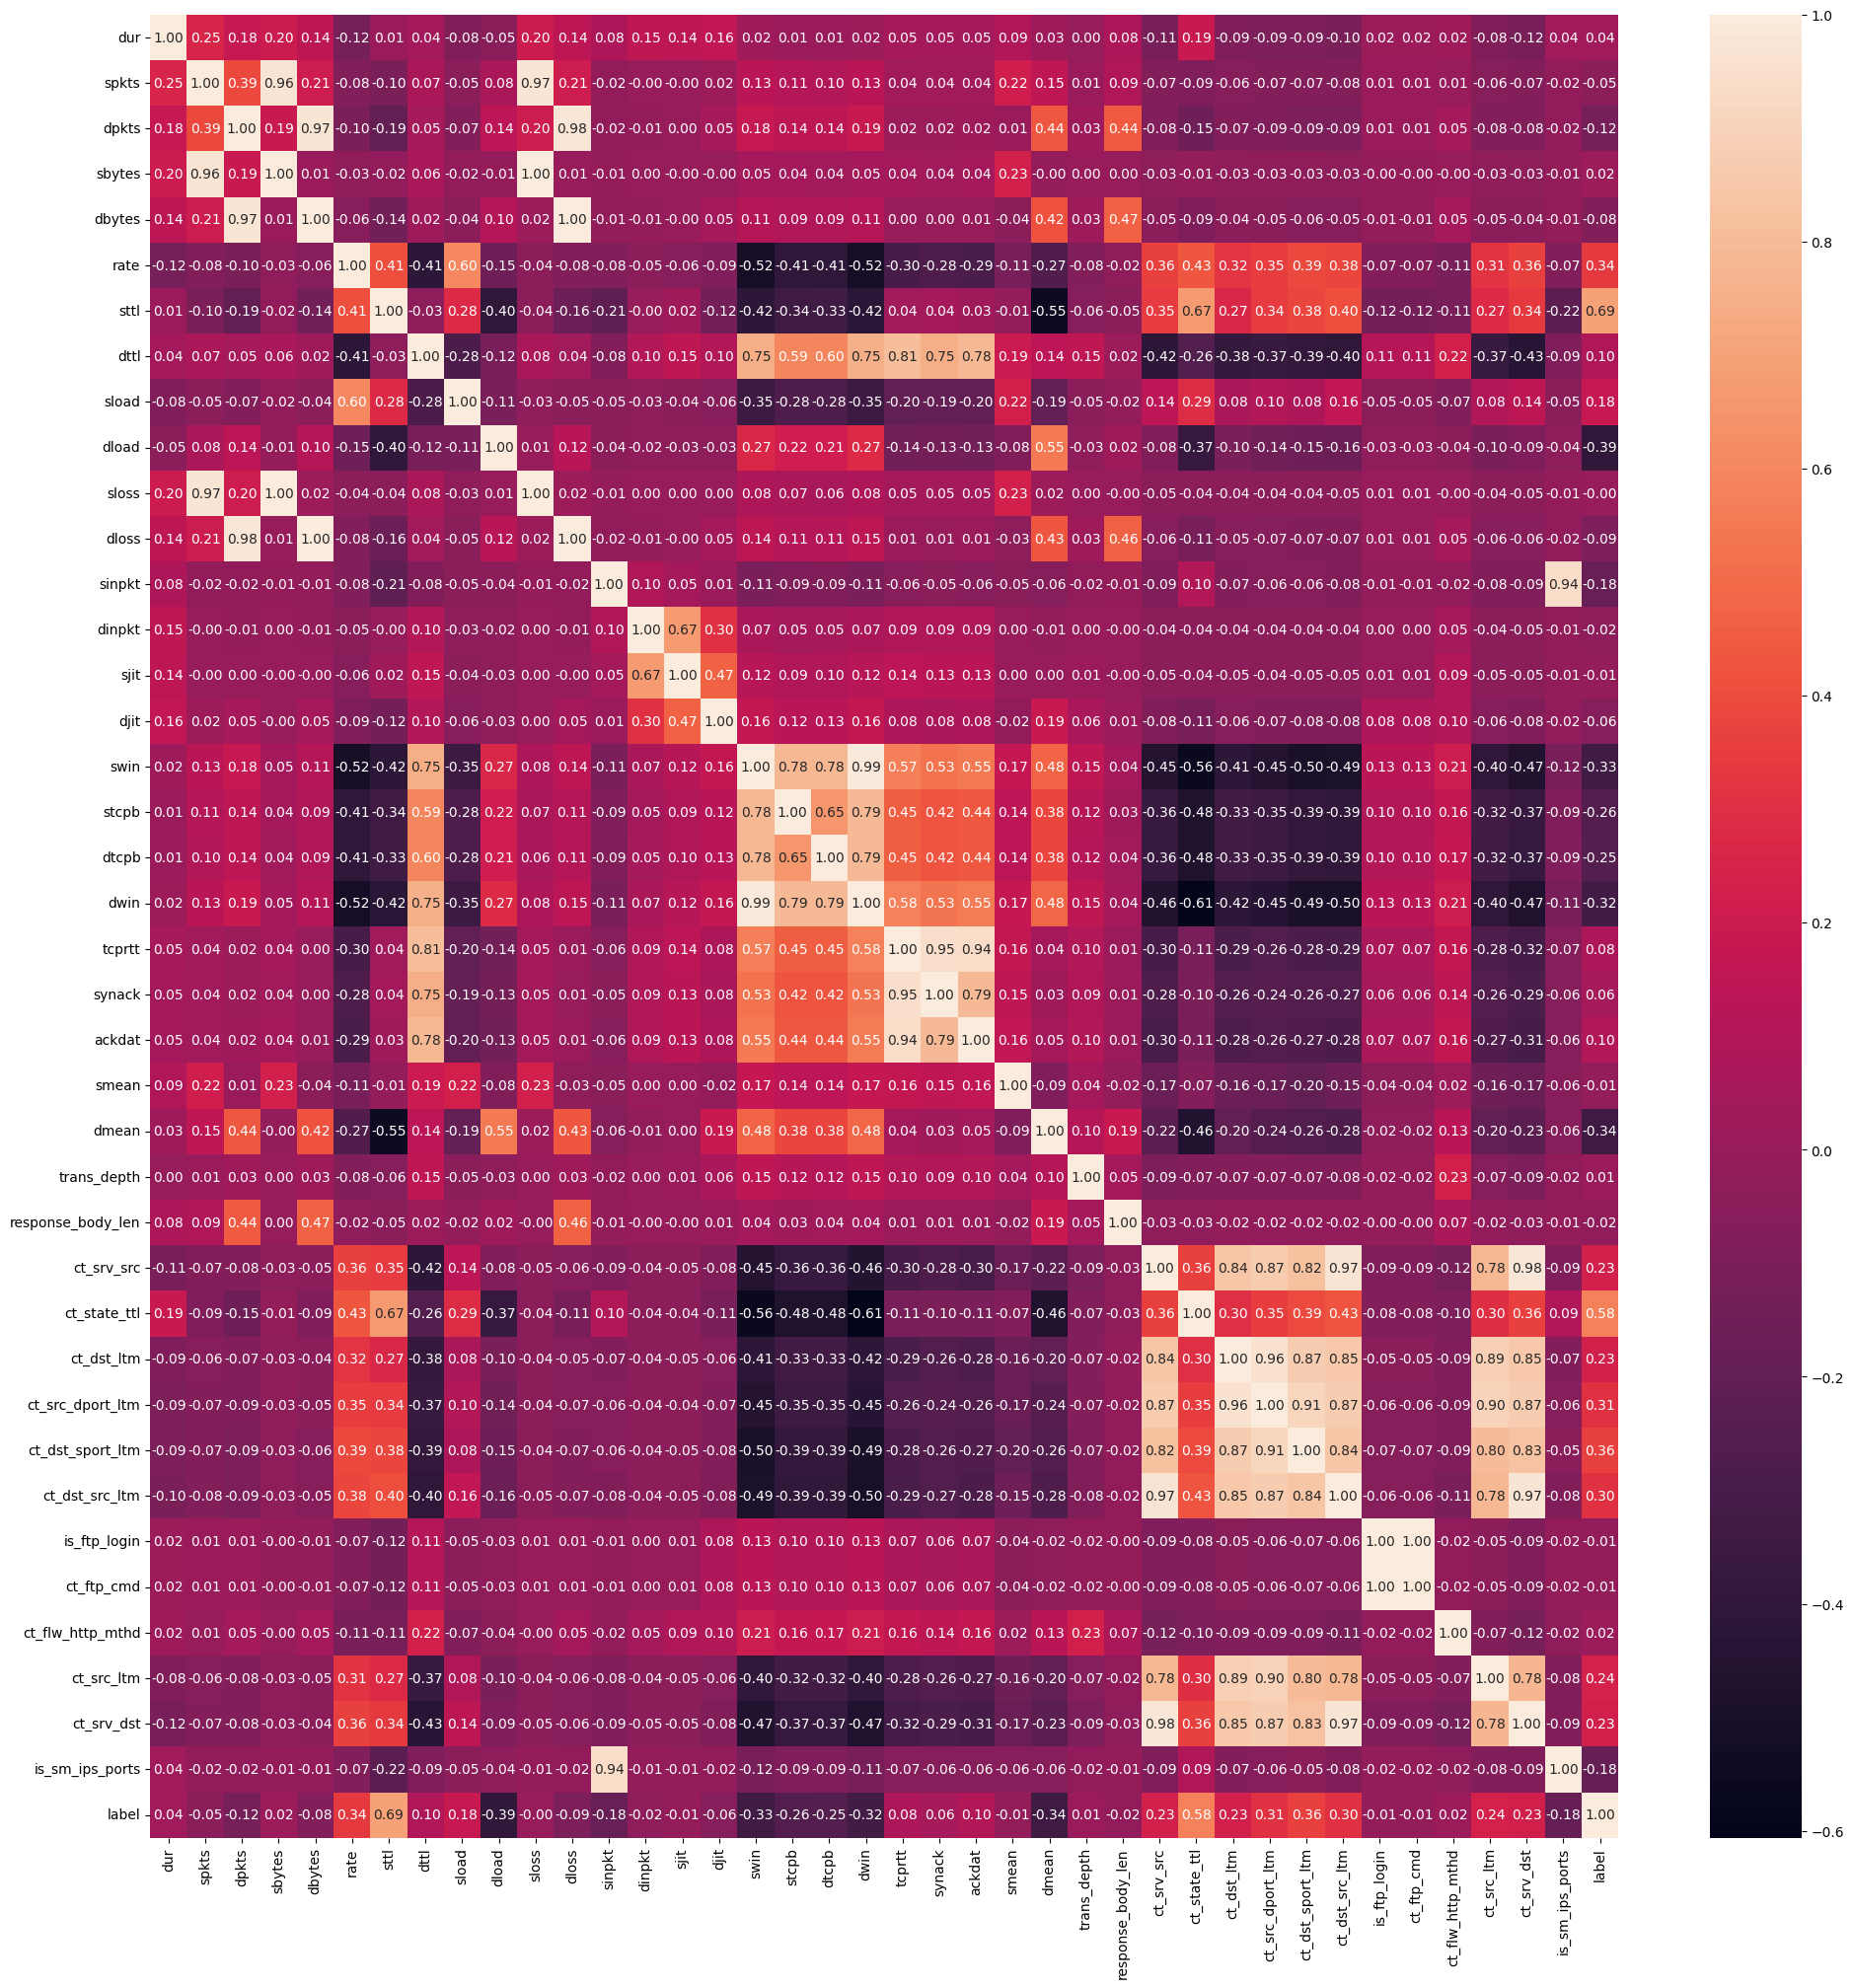

In [4]:
# 数値の列だけを取得
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.drop('id', axis=1, inplace=True)

# 各特徴量の相関係数を表示
plt.figure(figsize=(24, 24))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')
plt.show()

In [5]:
# レコード数が多いので、サンプリングする
df_numeric_sample = df_numeric.sample(n=10000, random_state=42)
sampled_indices = df_numeric_sample.index

# t-sneで二次元にプロット
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_numeric_sample)


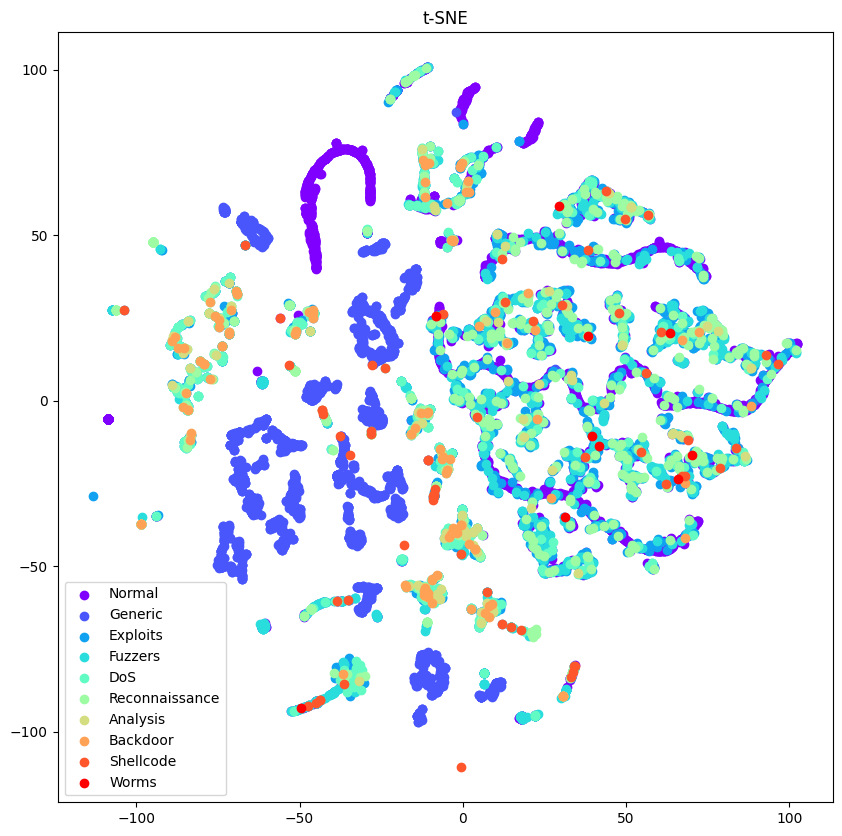

In [6]:
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'], index=sampled_indices)
tsne_df['attack_cat'] = df['attack_cat'].loc[sampled_indices]

# カテゴリごとに色をマッピングする辞書を作成
color_dict = {category: color for category, color in zip(tsne_df['attack_cat'].unique(), plt.cm.rainbow(np.linspace(0, 1, len(tsne_df['attack_cat'].unique()))))}

# attack_catの値を色に変換
colors = tsne_df['attack_cat'].map(color_dict)

plt.figure(figsize=(10, 10))
plt.title('t-SNE')

# attack_catの各カテゴリごとにscatterをプロット
for category, color in color_dict.items():
    mask = tsne_df['attack_cat'] == category
    plt.scatter(tsne_df.loc[mask, 'Dimension 1'], tsne_df.loc[mask, 'Dimension 2'], c=[color], label=category)

plt.legend()
plt.show()